# Investors' Sentiment & S&P500 : Data Collection (Target)
---

## Notebook Organisation:
1. Data Collection - Subreddit
2. **Data Collection - Target (Current Notebook)**
3. Merging Data
2. EDA and Preprocessing
3. Model Tuning and Insights

## Import Library
---

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import datetime as dt
from datetime import datetime


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_style('ticks')
%matplotlib inline

## Read CSV
---

In [6]:
sp500 = pd.read_csv('data/sp500.csv')

In [7]:
sp500.shape

(1259, 7)

In [8]:
sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-05,2013.780029,2021.939941,2004.170044,2016.709961,2016.709961,3706620000
1,2016-01-06,2011.709961,2011.709961,1979.050049,1990.260010,1990.260010,4336660000
2,2016-01-07,1985.319946,1985.319946,1938.829956,1943.089966,1943.089966,5076590000
3,2016-01-08,1945.969971,1960.400024,1918.459961,1922.030029,1922.030029,4664940000
4,2016-01-11,1926.119995,1935.650024,1901.099976,1923.670044,1923.670044,4607290000


In [9]:
sp500.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1254,2020-12-28,3723.030029,3740.510010,3723.030029,3735.360107,3735.360107,3527460000
1255,2020-12-29,3750.010010,3756.120117,3723.310059,3727.040039,3727.040039,3387030000
1256,2020-12-30,3736.189941,3744.629883,3730.209961,3732.040039,3732.040039,3145200000
1257,2020-12-31,3733.270020,3760.199951,3726.879883,3756.070068,3756.070068,3172510000
1258,2021-01-04,3764.610107,3769.989990,3691.310059,3706.250000,3706.250000,851768947


In [10]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [11]:
sp500.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,2685.862827,2699.169959,2671.060111,2686.137393,2686.137393,3.876726e+09
std,425.663196,428.259585,422.956853,425.513624,425.513624,1.005268e+09
min,1833.400024,1847.000000,1810.099976,1829.079956,1829.079956,8.517689e+08
25%,2366.335083,2373.755005,2354.724976,2365.125000,2365.125000,3.295675e+09
50%,2713.979980,2730.600098,2697.770020,2712.919922,2712.919922,3.637460e+09
75%,2932.314941,2946.170044,2918.970093,2937.935059,2937.935059,4.145745e+09
max,3764.610107,3769.989990,3730.209961,3756.070068,3756.070068,9.044690e+09


### Converting Dtypes of Data

In [12]:
def convert_to_datetime_int(df):
    date_list = []
    for d in sp500['Date']:
        date = dt.datetime.strptime(d, '%Y-%m-%d')
        date_list.append(date)
    df['Date'] = pd.Series(date_list)
    df['Adj Close'] = pd.to_numeric(df['Adj Close'], errors='coerce', downcast='float')
    return df

In [13]:
convert_to_datetime_int(sp500)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-05,2013.780029,2021.939941,2004.170044,2016.709961,2016.709961,3706620000
1,2016-01-06,2011.709961,2011.709961,1979.050049,1990.260010,1990.260010,4336660000
2,2016-01-07,1985.319946,1985.319946,1938.829956,1943.089966,1943.089966,5076590000
3,2016-01-08,1945.969971,1960.400024,1918.459961,1922.030029,1922.030029,4664940000
4,2016-01-11,1926.119995,1935.650024,1901.099976,1923.670044,1923.670044,4607290000
5,2016-01-12,1927.829956,1947.380005,1914.349976,1938.680054,1938.680054,4887260000
6,2016-01-13,1940.339966,1950.329956,1886.410034,1890.280029,1890.280029,5087030000
7,2016-01-14,1891.680054,1934.469971,1878.930054,1921.839966,1921.839966,5241110000
8,2016-01-15,1916.680054,1916.680054,1857.829956,1880.329956,1880.329956,5468460000
9,2016-01-19,1888.660034,1901.439941,1864.599976,1881.329956,1881.329956,4928350000


In [14]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   Open       1259 non-null   float64       
 2   High       1259 non-null   float64       
 3   Low        1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Adj Close  1259 non-null   float32       
 6   Volume     1259 non-null   int64         
dtypes: datetime64[ns](1), float32(1), float64(4), int64(1)
memory usage: 64.1 KB


In [15]:
sp500.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Range of Target Data Collected

In [16]:
sp500['month'] = sp500['Date'].dt.month
sp500['year'] = sp500['Date'].dt.year

In [17]:
sp500 = sp500.loc[(sp500['year'] == 2019) | (sp500['year'] == 2020)]

In [18]:
print(min(sp500['Date']))
print(max(sp500['Date']))

2019-01-02 00:00:00
2020-12-31 00:00:00


## ID Daily Difference & Percentage Change
---

### Function to obtain daily difference and change in percentage

In [19]:
def get_change_in_Adj_Close(df):
    df = df.sort_index()
    df['Diff'] = df['Adj Close'].diff()
    df['Percent_Change'] = (df['Adj Close']-df['Adj Close'].shift(1))/df['Adj Close']
    return df

In [20]:
sp500_df = get_change_in_Adj_Close(sp500)

In [21]:
sp500_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,month,year,Diff,Percent_Change
753,2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000,1,2019,NaN,NaN
754,2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3822860000,1,2019,-62.140137,-0.025385
755,2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4213410000,1,2019,84.050049,0.033196
756,2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4104710000,1,2019,17.750000,0.006962
757,2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4083030000,1,2019,24.719971,0.009602


### Obtaining the distrubution of Percentage Change

In [22]:
# Look at the distribution of Percent_Change to determine what threshold to use
print('Min: ', sp500_df['Percent_Change'].min())
print('Max: ', sp500_df['Percent_Change'].max())
print('Mean: ', sp500_df['Percent_Change'].mean())


print('Mode: ', "{0:.10f}".format(round(sp500_df['Percent_Change'],3).mode()[0]))
print('Mode: ', "{0:.10f}".format(round(sp500_df['Percent_Change'],5).mode()[0]))

Min:  -0.1361577808856964
Max:  0.08577926456928253
Mean:  0.0006638942868448794
Mode:  0.0010000000
Mode:  -0.0030300000


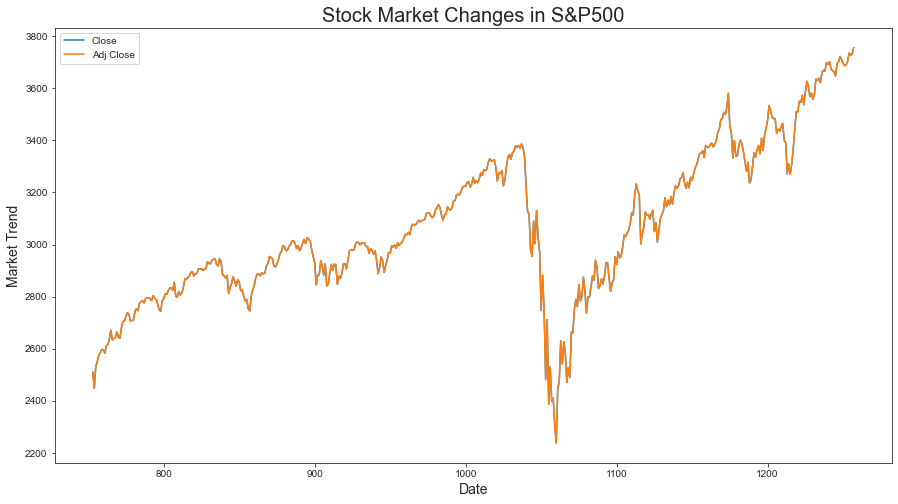

In [25]:
sp500_df[['Close', 'Adj Close']].plot(figsize=(15,8))
plt.title('Stock Market Changes in S&P500', fontsize=20)
plt.ylabel('Market Trend', fontsize=14)
plt.xlabel('Date', fontsize=14);

## Classifying Percentage Change as Up/Down
---

### Threshold of 1%

The threshold should not be set as 1% as it will cost the dataset to be imbalance. Hence, the threshold to will be lowered.

In [22]:
# Make threshold 1% (for percent change in daily Close price)
def make_binary(data):
    data_list = []
    for d in data:
        if round(d,5) < 0.1:
            data_list.append('down')
        elif round(d,5) == 0.1:
            data_list.append('neutral')
        elif round(d,5) > 0.1:
            data_list.append('up')
        else:
            data_list.append('n/a')
    return data_list

In [23]:
sp500_df['Percent_Change_Class'] = make_binary(sp500_df['Percent_Change'])

In [24]:
sp500_df['Percent_Change_Class'].value_counts()

down    504
n/a       1
Name: Percent_Change_Class, dtype: int64

### Threshold of 0.1%

The threshold should not be set as 0.1% as it will cost the dataset to be imbalance. Hence, the threshold to will be lowered.

In [25]:
# Make threshold .1% (for percent change in daily Close price)
def make_binary(data):
    data_list = []
    for d in data:
        if round(d,5) < 0.01:
            data_list.append('down')
        elif round(d,5) == 0.01:
            data_list.append('neutral')
        elif round(d,5) > 0.01:
            data_list.append('up')
        else:
            data_list.append('n/a')
    return data_list

In [26]:
sp500_df['Percent_Change_Class'] = make_binary(sp500_df['Percent_Change'])

In [27]:
sp500_df['Percent_Change_Class'].value_counts()

down    420
up       84
n/a       1
Name: Percent_Change_Class, dtype: int64

### Threshold of 0.01%

In [28]:
# Make threshold .01% (for percent change in daily Close price)
def make_binary(data):
    data_list = []
    for d in data:
        if round(d,5) < 0.001:
            data_list.append('down')
        elif round(d,5) == 0.001:
            data_list.append('neutral')
        elif round(d,5) > 0.001:
            data_list.append('up')
        else:
            data_list.append('n/a')
    return data_list

In [29]:
sp500_df['Percent_Change_Class'] = make_binary(sp500_df['Percent_Change'])

In [30]:
sp500_df['Percent_Change_Class'].value_counts()

up      264
down    240
n/a       1
Name: Percent_Change_Class, dtype: int64

### Threshold on -ve and +ve

This threshold was selected as it is the most balanced and accurate among the rest of the threshold in determining the UP and DOWN trend in terms of the stock market performance throughout a given period.

In [39]:
def make_binary(data):
    data_list = []
    for d in data:
        # negative class
        if round(d,5) < 0:
            data_list.append('down')
        elif round(d,5) == 0:
            data_list.append('neutral')
        # postive class
        elif round(d,5) > 0:
            data_list.append('up')
        else:
            data_list.append('n/a')
    return data_list

In [40]:
sp500_df['Percent_Change_Class'] = make_binary(sp500_df['Percent_Change'])

In [41]:
sp500_df['Percent_Change_Class'].value_counts()

up      294
down    210
n/a       1
Name: Percent_Change_Class, dtype: int64

In [42]:
sp500_df['Percent_Change_Class'].value_counts(normalize=True)

up      0.582178
down    0.415842
n/a     0.001980
Name: Percent_Change_Class, dtype: float64

In [32]:
sp500_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,month,year,Diff,Percent_Change,Percent_Change_Class
753,2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000,1,2019,NaN,NaN,n/a
754,2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3822860000,1,2019,-62.140137,-0.025385,down
755,2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4213410000,1,2019,84.050049,0.033196,up
756,2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4104710000,1,2019,17.750000,0.006962,up
757,2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4083030000,1,2019,24.719971,0.009602,up


## To CSV
---

In [43]:
sp500_df.to_csv('data/sp500_diff.csv', index=False)